<a href="https://colab.research.google.com/github/athulskrish/tobacco/blob/main/Tobacco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Statistics on Smoking in England report aims to present a broad picture of health issues relating to smoking in
England and covers topics such as smoking prevalence, habits, behaviours, and attitudes, smoking-related health
issues and mortality, and associated costs.
Acknowledgements
This report contains data and information previously published by the Health and Social Care Information Centre
(HSCIC), Department of Health, the Office for National Statistics, and Her Majesty’s Revenue and Customs
Tobacco Use and Mortality Machine Learning Project
This project involves using machine learning to analyze the relationship between tobacco use
and mortality rates. The goal is to predict the likelihood of mortality based on various factors
related to tobacco use. Here's a detailed outline to guide you through the project:
1. Problem Definition
● Objective: Predict the likelihood of mortality based on tobacco use patterns and related
factors.
● Scope: Focus on a specific demographic or geographic region if necessary, and
consider both direct and indirect factors influencing mortality.
2. Data Collection
● Datasets:
○ Health Surveys: National Health and Nutrition Examination Survey (NHANES),
Behavioral Risk Factor Surveillance System (BRFSS).
○ Mortality Data: World Health Organization (WHO), Centers for Disease Control
and Prevention (CDC).
○ Tobacco Use Data: Surveys on smoking habits, duration, frequency, and types
of tobacco used.
○ Socioeconomic Data: Age, gender, income, education level, occupation.
○ Health Data: Pre-existing conditions, lifestyle habits, healthcare access.
3. Data Preprocessing
● Data Cleaning: Handle missing values, outliers, and inconsistencies.
● Data Integration: Merge datasets from different sources to create a comprehensive
dataset.
● Feature Engineering: Create relevant features such as:
○ Duration of tobacco use.
○ Frequency and type of tobacco products used.
○ Demographic factors (age, gender).
○ Socioeconomic factors (income, education).
○ Health-related factors (pre-existing conditions, healthcare access).
4. Exploratory Data Analysis (EDA)
● Visualizations: Use histograms, scatter plots, and heatmaps to understand distributions
and correlations.
● Statistical Analysis: Perform correlation analysis to identify significant relationships
between features and mortality.
5. Model Selection
● Supervised Learning Algorithms: Consider algorithms suitable for classification problems
such as:
○ Logistic Regression.
○ Decision Trees and Random Forests.
○ Gradient Boosting Machines (e.g., XGBoost, LightGBM).
○ Support Vector Machines (SVM).
○ Neural Networks.
6. Model Training and Evaluation
● Training: Split the dataset into training and testing sets. Use cross-validation to ensure
robust model performance.
● Evaluation Metrics: Choose appropriate metrics such as accuracy, precision, recall,
F1-score, and ROC-AUC score.
● Model Tuning: Perform hyperparameter tuning to optimize model performance using
techniques like Grid Search or Random Search.
7. Model Interpretation
● Feature Importance: Identify which features are most influential in predicting mortality.
● Model Explainability: Use tools like SHAP (SHapley Additive exPlanations) or LIME
(Local Interpretable Model-agnostic Explanations) to explain model predictions.
8. Deployment
● API Development: Create an API for the model using frameworks like Flask or FastAPI.
● Web Application: Develop a user interface to input data and display predictions using
frameworks like Streamlit or Dash.
9. Monitoring and Maintenance
● Model Monitoring: Continuously monitor the model's performance using new data to
ensure its accuracy and reliability.
● Regular Updates: Update the model periodically with new data to maintain its
relevance.
10. Documentation and Reporting
● Documentation: Maintain comprehensive documentation of the project, including data
sources, preprocessing steps, model selection, and evaluation results.
● Reporting: Create detailed reports and visualizations to communicate findings and
insights to stakeholders.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Smokers**

In [103]:
smokers= pd.read_csv('/content/drive/MyDrive/UML/tobbaco/smokers.csv')

In [104]:
smokers.describe()

,Year,16 and Over,16-24,25-34,35-49,50-59,60 and Over
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,1997.250000,27.892857,31.345238,33.678571,31.285714,28.952381,18.750000
std,12.142601,7.525087,5.954636,7.287819,8.161873,9.376855,7.441134
min,1974.000000,17.000000,20.000000,20.000000,20.000000,18.000000,10.000000
25%,1987.500000,22.000000,26.000000,28.000000,25.000000,22.000000,13.000000
50%,2000.500000,27.000000,33.000000,34.000000,29.500000,26.000000,16.000000
75%,2007.250000,32.000000,35.000000,37.000000,36.000000,34.250000,23.000000
max,2014.000000,51.000000,47.000000,55.000000,55.000000,53.000000,44.000000


In [105]:
smokers.isna().sum()

,0
Year,0
Method,0
Sex,28
16 and Over,0
16-24,0
25-34,0
35-49,0
50-59,0
60 and Over,0


In [106]:
# smokers.fillna(0,inplace=True)

In [107]:
smokers.Sex.unique()

array([nan, 'Male', 'Female'], dtype=object)

In [108]:
smokers.tail()

,Year,Method,Sex,16 and Over,16-24,25-34,35-49,50-59,60 and Over
79,2010,Weighted,Female,20,24,25,23,20,13
80,2011,Weighted,Female,19,24,21,23,18,12
81,2012,Weighted,Female,19,23,23,21,19,12
82,2013,Weighted,Female,17,20,20,20,19,10
83,2014,Weighted,Female,17,21,22,20,18,11


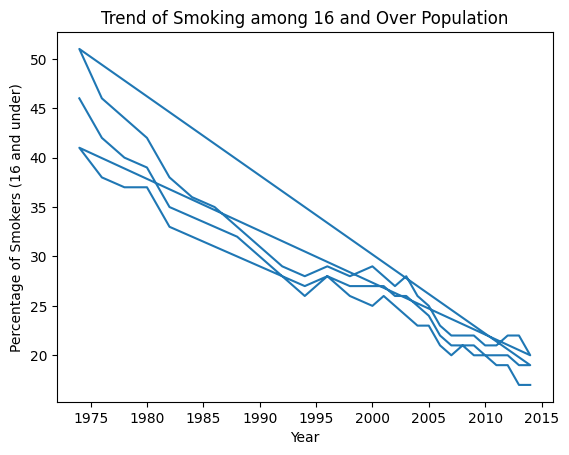

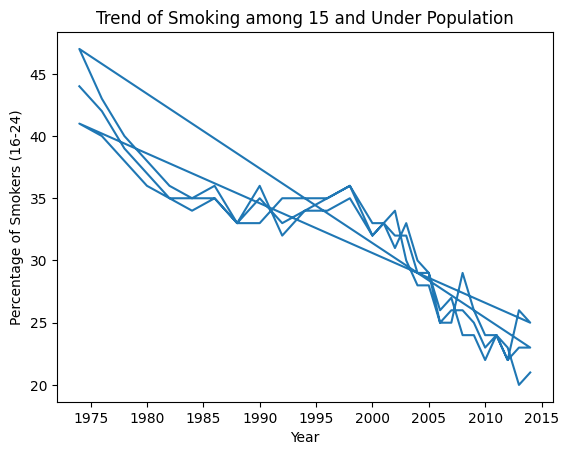

In [109]:
# prompt: Using dataframe smokers: timeseries

# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming you want to plot the trend of "16 and Over" over time
plt.plot(smokers['Year'], smokers['16 and Over'])
plt.xlabel('Year')
plt.ylabel('Percentage of Smokers (16 and under)')
plt.title('Trend of Smoking among 16 and Over Population')
plt.show()

plt.plot(smokers['Year'], smokers['16-24'])
plt.xlabel('Year')
plt.ylabel('Percentage of Smokers (16-24)')
plt.title('Trend of Smoking among 15 and Under Population')
plt.show()


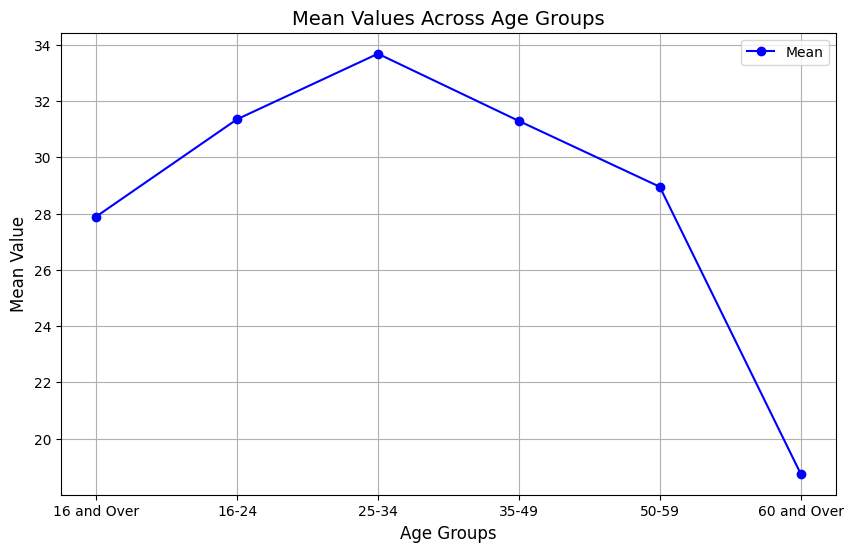

In [110]:
import matplotlib.pyplot as plt

# Data for the chart
age_groups = ["16 and Over", "16-24", "25-34", "35-49", "50-59", "60 and Over"]
mean_values = [27.89, 31.35, 33.68, 31.29, 28.95, 18.75]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(age_groups, mean_values, marker='o', label='Mean', color='blue')
plt.title('Mean Values Across Age Groups', fontsize=14)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


# **Admissions**

In [111]:
admissions = pd.read_csv('/content/drive/MyDrive/UML/tobbaco/admissions.csv')

In [112]:
admissions.describe()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
count,2079,2079,2079,2079,2079,1386,2078
unique,11,32,32,11,2,2,1420
top,2014/15,All codes,All admissions,Cancers which can be caused by smoking,Number of admissions,Male,.
freq,189,66,66,726,1056,693,40


In [113]:
admissions.head(5)

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


In [114]:

unique_diagnosis_types = admissions["Diagnosis Type"].unique()
print(unique_diagnosis_types)


['All admissions' 'All diseases which can be caused by smoking'
 'All cancers' 'All respiratory diseases' 'All circulatory diseases'
 'All diseases of the digestive system'
 'Cancers which can be caused by smoking'
 'Respiratory diseases which can be caused by smoking'
 'Circulatory diseases which can be caused by smoking'
 'Digestive diseases which can be caused caused by smoking'
 'Other diseases which can be caused by smoking']


In [115]:
# Convert "Diagnosis Type" to string
admissions["Diagnosis Type"] = admissions["Diagnosis Type"].astype(str)

# Convert "Value" to numeric (if it contains non-numeric values)
admissions["Value"] = pd.to_numeric(admissions["Value"], errors='coerce')


In [116]:
unique_diagnosis_types = admissions["Diagnosis Type"].unique()  # Already unique
values = admissions.groupby("Diagnosis Type")["Value"].sum()  # Aggregate by type


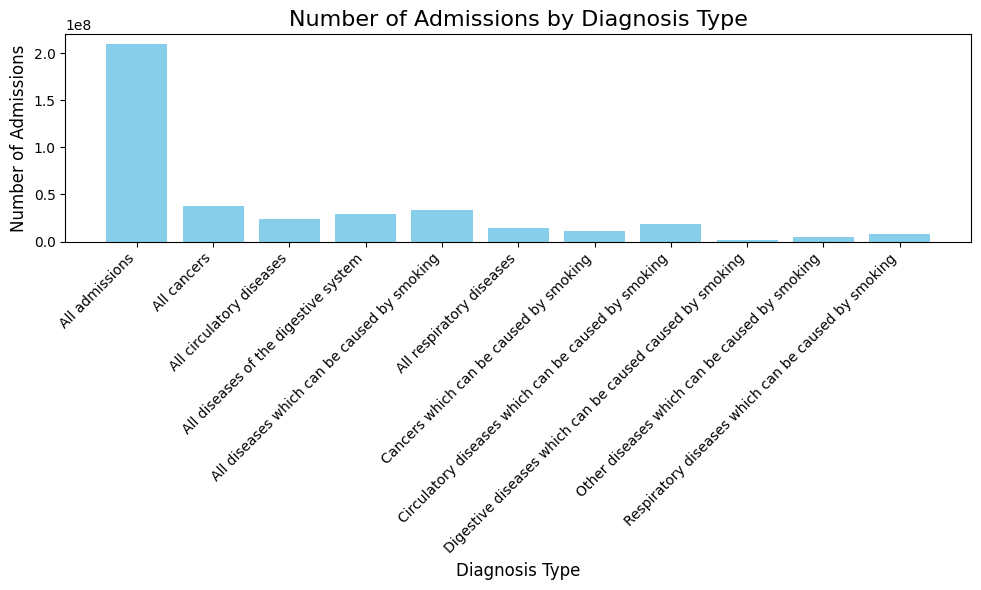

In [117]:
import matplotlib.pyplot as plt

# Bar chart for number of admissions by diagnosis type
plt.figure(figsize=(10, 6))
plt.bar(values.index, values.values, color="skyblue")  # Use aggregated values
plt.title("Number of Admissions by Diagnosis Type", fontsize=16)
plt.xlabel("Diagnosis Type", fontsize=12)
plt.ylabel("Number of Admissions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [118]:
# Convert 'Year' to numeric (midpoint for ranges)
admissions['Year'] = admissions['Year'].apply(
    lambda x: float(x.split('/')[0]) + 0.5 if isinstance(x, str) else x
)


In [119]:
# Calculate mean year for each Diagnosis Type
meanofdiagnosis = admissions.groupby('Year')['Value'].mean()


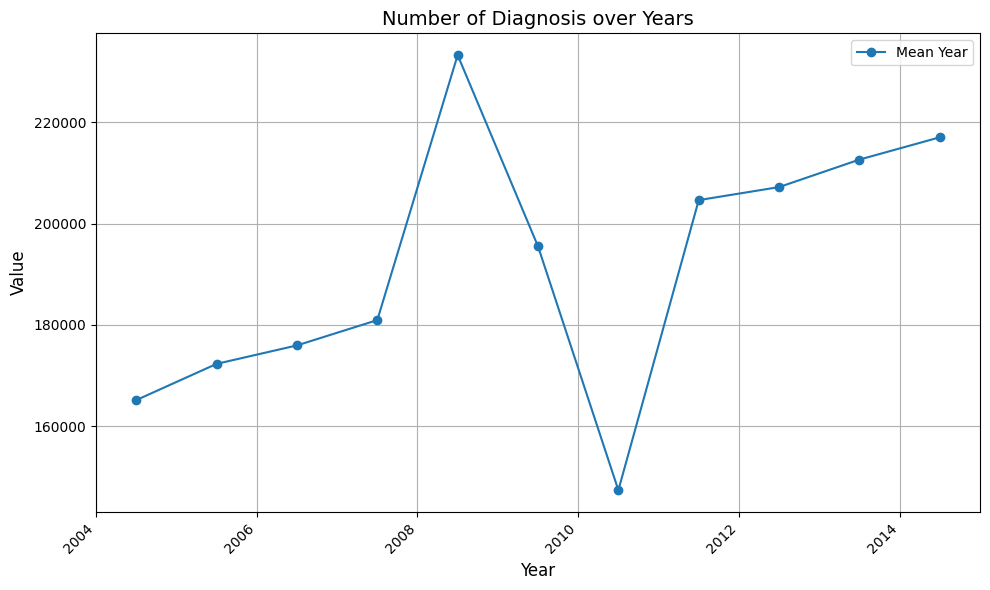

In [120]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(meanofdiagnosis.index, meanofdiagnosis.values, marker='o', label='Mean Year')
plt.title('Number of Diagnosis over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# **Prescriptions**

In [121]:
prescriptions= pd.read_csv("/content/drive/MyDrive/UML/tobbaco/prescriptions.csv")

In [122]:
prescriptions.head(10)

,Year,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions,Net Ingredient Cost of All Pharmacotherapies,Net Ingredient Cost of Nicotine Replacement Therapies (NRT),Net Ingredient Cost of Bupropion (Zyban),Net Ingredient Cost of Varenicline (Champix)
0,2014/15,1348,766,21,561.0,38145,18208,807,19129.0
1,2013/14,1778,1059,22,697.0,48767,24257,865,23646.0
2,2012/13,2203,1318,26,859.0,58121,28069,994,29058.0
3,2011/12,2532,1545,30,957.0,64552,30951,1216,32385.0
4,2010/11,2564,1541,36,987.0,65883,30808,1581,33494.0
5,2009/10,2483,1559,47,877.0,63425,31429,2060,29936.0
6,2008/09,2263,1492,58,714.0,57520,30683,2143,24694.0
7,2007/08,2475,1756,107,612.0,61479,35883,3882,21714.0
8,2006/07,2079,1938,119,22.0,44817,39743,4315,760.0
9,2005/06,2205,2076,129,NaN,48092,43465,4627,NaN


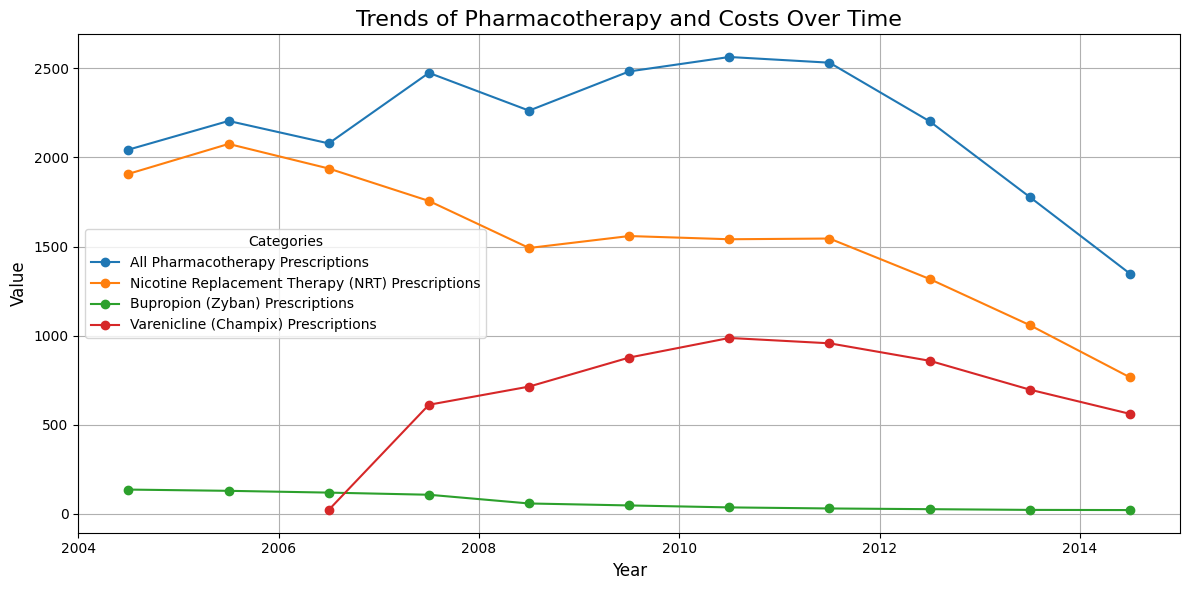

In [123]:

# Convert "Year" to numeric for proper plotting
prescriptions["Year"] = prescriptions["Year"].astype(str)

# Now apply the split operation
prescriptions["Year"] = prescriptions["Year"].apply(lambda x: int(x.split("/")[0]) + 0.5 if "/" in x else float(x))



# Plot a line chart
plt.figure(figsize=(12, 6))
for column in prescriptions.columns[1:5]:
    plt.plot(prescriptions["Year"], prescriptions[column], label=column, marker='o')

plt.title("Trends of Pharmacotherapy and Costs Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Categories")
plt.grid(True)
plt.tight_layout()
plt.show()


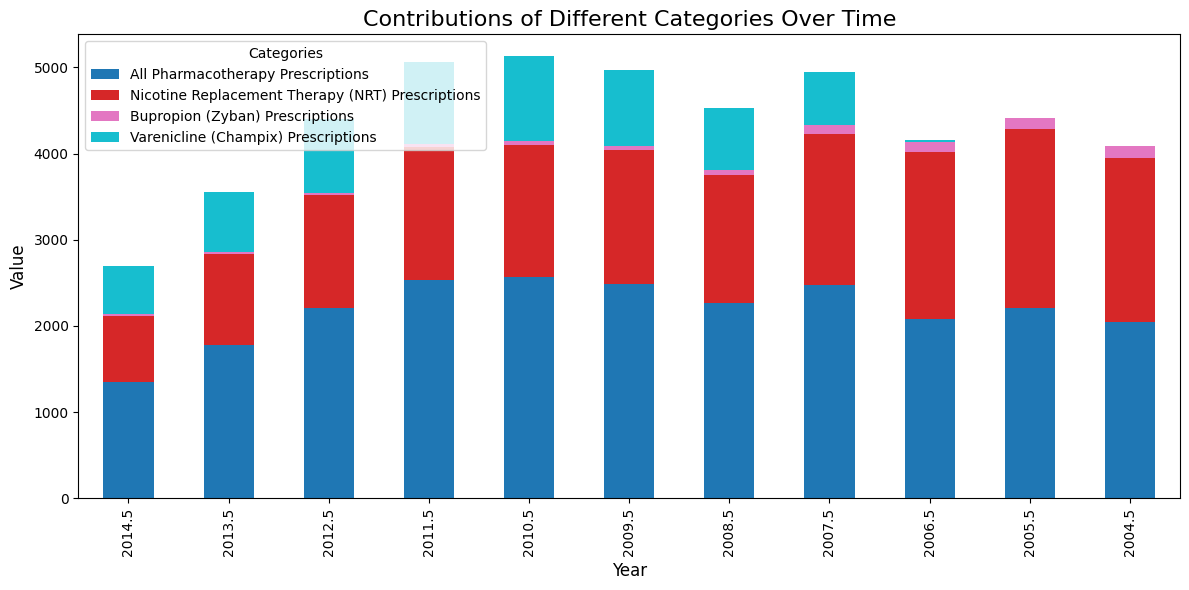

In [124]:
# Plot a stacked bar chart

# prescriptions.set_index("Year", inplace=True)
pres=prescriptions[['Year','All Pharmacotherapy Prescriptions','Nicotine Replacement Therapy (NRT) Prescriptions','Bupropion (Zyban) Prescriptions', 'Varenicline (Champix) Prescriptions']]
pres.set_index("Year", inplace=True)
pres.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
# print(pres)
# prescriptions["Year", 	"All Pharmacotherapy Prescriptions", "Nicotine Replacement Therapy (NRT) Prescriptions","Bupropion (Zyban) Prescriptions", 	"Varenicline (Champix) Prescriptions"].plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")

plt.title("Contributions of Different Categories Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Categories")
plt.tight_layout()
plt.show()


In [127]:
pres

,All Pharmacotherapy Prescriptions,Nicotine Replacement Therapy (NRT) Prescriptions,Bupropion (Zyban) Prescriptions,Varenicline (Champix) Prescriptions
Year,,,,
2014.5,1348,766,21,561.0
2013.5,1778,1059,22,697.0
2012.5,2203,1318,26,859.0
2011.5,2532,1545,30,957.0
2010.5,2564,1541,36,987.0
2009.5,2483,1559,47,877.0
2008.5,2263,1492,58,714.0
2007.5,2475,1756,107,612.0
2006.5,2079,1938,119,22.0


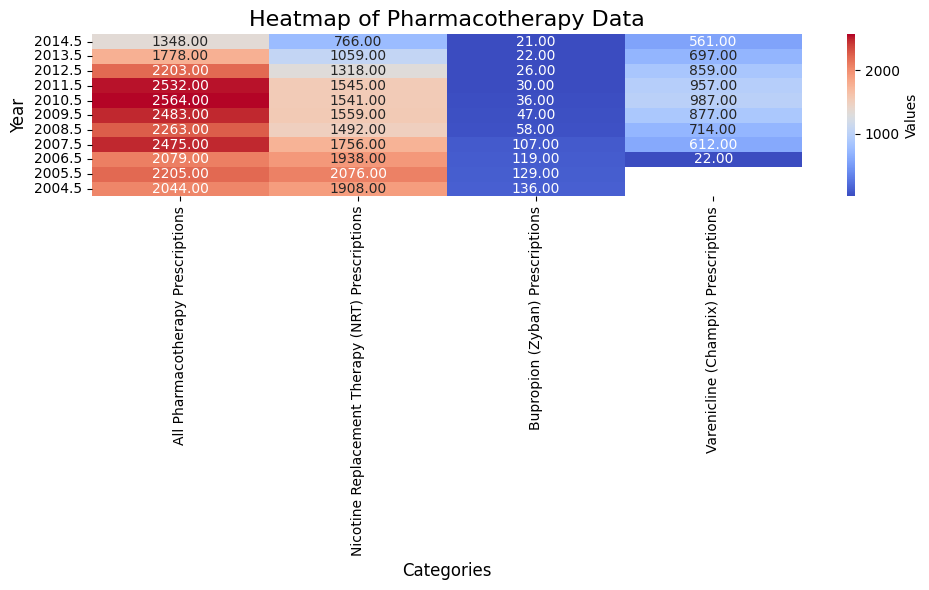

In [140]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(pres, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Values'})

plt.title("Heatmap of Pharmacotherapy Data", fontsize=16)
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.tight_layout()
plt.show()


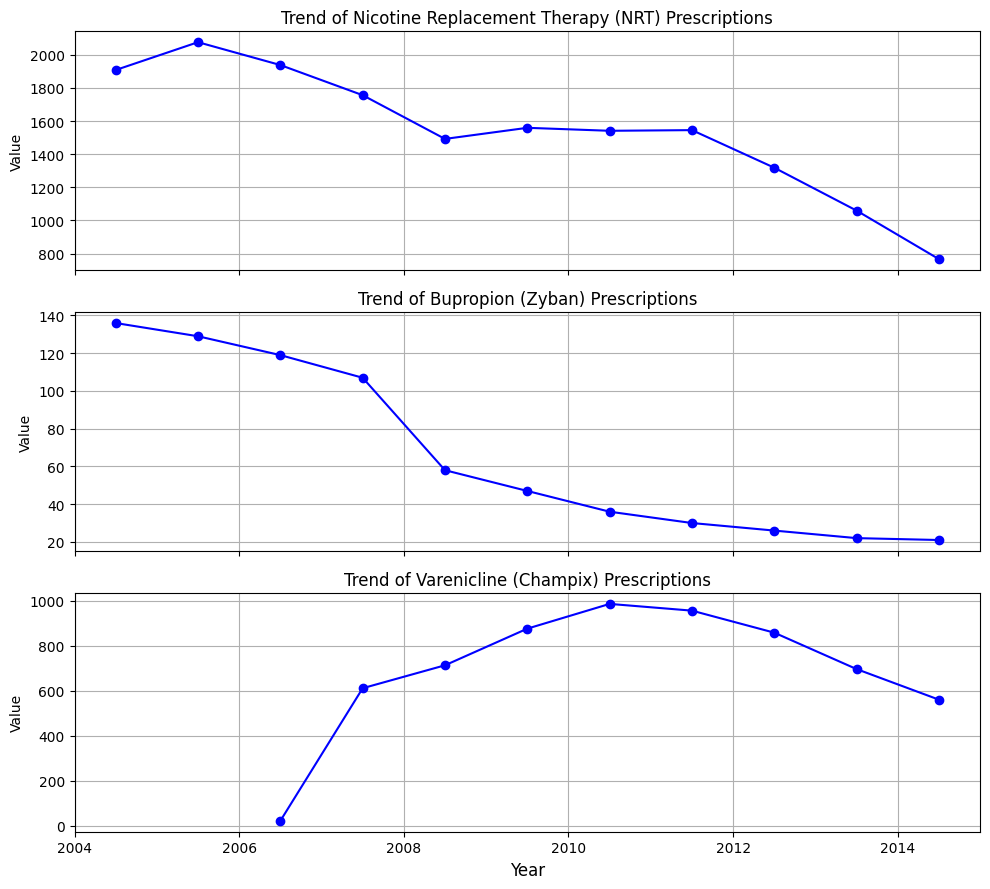

In [138]:
# Plot each category separately
categories = pres.columns[1:]
fig, axes = plt.subplots(len(categories), 1, figsize=(10, len(categories) * 3), sharex=True)

for i, category in enumerate(categories):
    axes[i].plot(pres.index, pres[category], marker='o', color='b')
    axes[i].set_title(f"Trend of {category}", fontsize=12)
    axes[i].set_ylabel("Value", fontsize=10)
    axes[i].grid(True)

plt.xlabel("Year", fontsize=12)
plt.tight_layout()
plt.show()


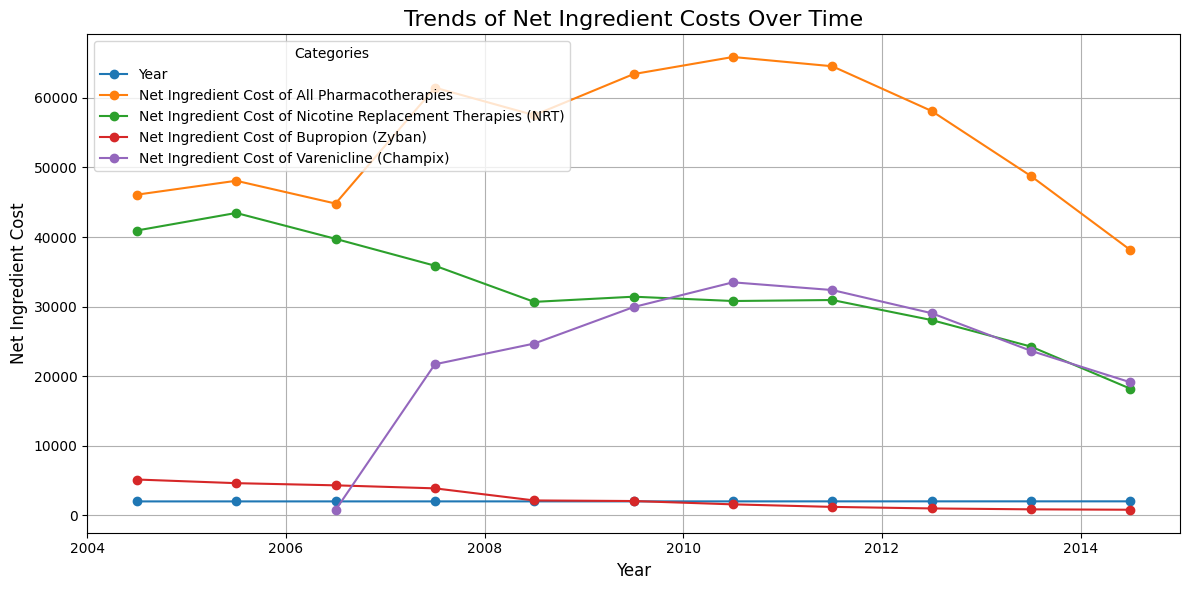

In [149]:
ingredient_costs=prescriptions[['Year','Net Ingredient Cost of All Pharmacotherapies', 	'Net Ingredient Cost of Nicotine Replacement Therapies (NRT)','Net Ingredient Cost of Bupropion (Zyban)', 	'Net Ingredient Cost of Varenicline (Champix)']]

# Plot unused columns
plt.figure(figsize=(12, 6))
for column in ingredient_costs:
    plt.plot(prescriptions["Year"], ingredient_costs[column], label=column, marker='o')

plt.title("Trends of Net Ingredient Costs Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Net Ingredient Cost", fontsize=12)
plt.legend(title="Categories")
plt.grid(True)
plt.tight_layout()
plt.show()


# **Fatalities**

In [150]:
fatality=pd.read_csv('/content/drive/MyDrive/UML/tobbaco/fatalities.csv')

In [151]:
fatality.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014,All codes,All deaths,All deaths,Number of observed deaths,NaN,459087
1,2014,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All deaths which can be caused by smoking,All deaths which can be caused by smoking,Number of observed deaths,NaN,235820
2,2014,C00-D48,All cancers,All cancers,Number of observed deaths,NaN,136312
3,2014,J00-J99,All respiratory diseases,All respiratory diseases,Number of observed deaths,NaN,61744
4,2014,I00-I99,All circulatory diseases,All circulatory diseases,Number of observed deaths,NaN,126101


In [152]:
fatality.Metric.unique()

array(['Number of observed deaths', 'Attributable number'], dtype=object)

In [153]:
fatality.shape

(1749, 7)

In [159]:
fatality['ICD10 Code'].unique()

array(['All codes',
       'C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C64-C66 & C68 & C16 & C25 & C80 & C92 & J40-J43 & J44 & J10-J18 & I00-I09 & I26-I51 & I20-I25 & I72-I78 & I60-I69 & I71 & I70 & K25-K27 & K50 & K05 & H25 & S72.0-S72.2 & O03',
       'C00-D48', 'J00-J99', 'I00-I99', 'K00-K93', 'C33-C34', 'C00-C14',
       'C32', 'C15', 'C53', 'C67', 'C64-C66 & C68', 'C16', 'C25', 'C80',
       'C92', 'J40-J43', 'J44', 'J10-J18', 'I00-I09 & I26-I51', 'I20-I25',
       'I72-I78', 'I60-I69', 'I71', 'I70', 'K25-K27'], dtype=object)

In [168]:
for column in fatality:
  print(column, fatality[column].isnull().sum())

Year 0
ICD10 Code 0
ICD10 Diagnosis 0
Diagnosis Type 0
Metric 0
Sex 583
Value 0


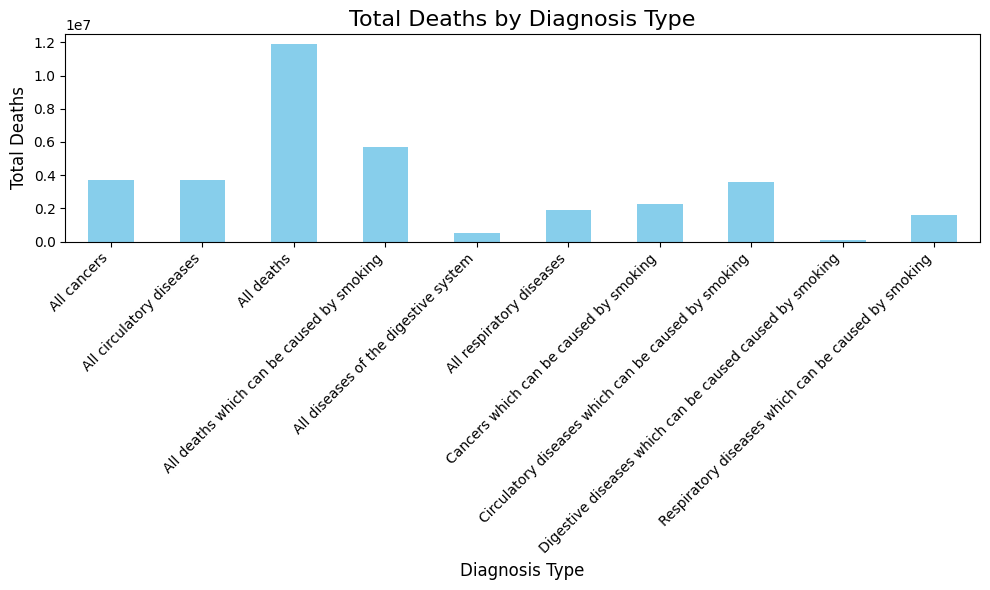

In [170]:
# Aggregating total values for each diagnosis type
fatality['Value'] = pd.to_numeric(fatality['Value'], errors='coerce')  # Convert to numeric, handle errors
diagnosis_totals = fatality.groupby("Diagnosis Type")["Value"].sum()


# Plotting
diagnosis_totals.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Total Deaths by Diagnosis Type", fontsize=16)
plt.xlabel("Diagnosis Type", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


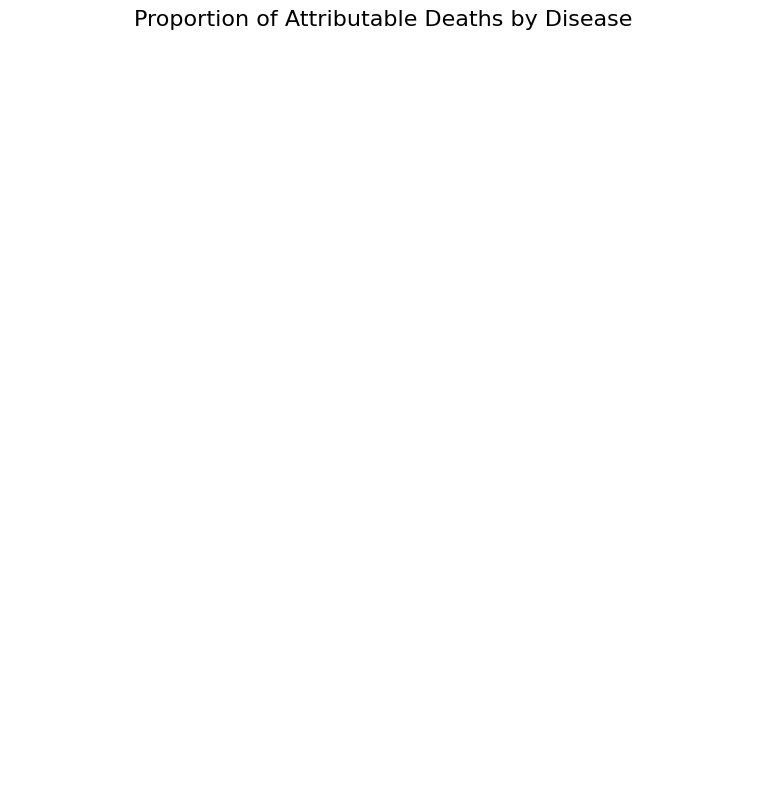

In [172]:
# Filter only "Attributable number" data
attributable_data = fatality[fatality["Diagnosis Type"] == "Attributable number"]

# Summing values for each ICD10 Diagnosis
attributable_totals = attributable_data.groupby("ICD10 Diagnosis")["Value"].sum()

# Plotting
attributable_totals.plot(kind="pie", figsize=(8, 8), autopct='%1.1f%%', startangle=90, colormap="tab20")
plt.title("Proportion of Attributable Deaths by Disease", fontsize=16)
plt.ylabel("")  # Hide the y-axis label
plt.tight_layout()
plt.show()
